In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
IMG_DIR = 'camera_cal'
NX, NY = 9, 6  # number of points on a chessboard

objpoints = []  # 3d points in real world space
imgpoints = []  # 2d points in image plane.

objp = np.zeros((NX * NY, 3), np.float32)
objp[:, :2] = np.mgrid[0:NX, 0:NY].T.reshape(-1, 2)

# get the list of calibration images
images = [os.path.join(IMG_DIR, filename) for filename in os.listdir(IMG_DIR)]

for image in images:
    img = cv2.imread(image)

    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (NX, NY), None)
    
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

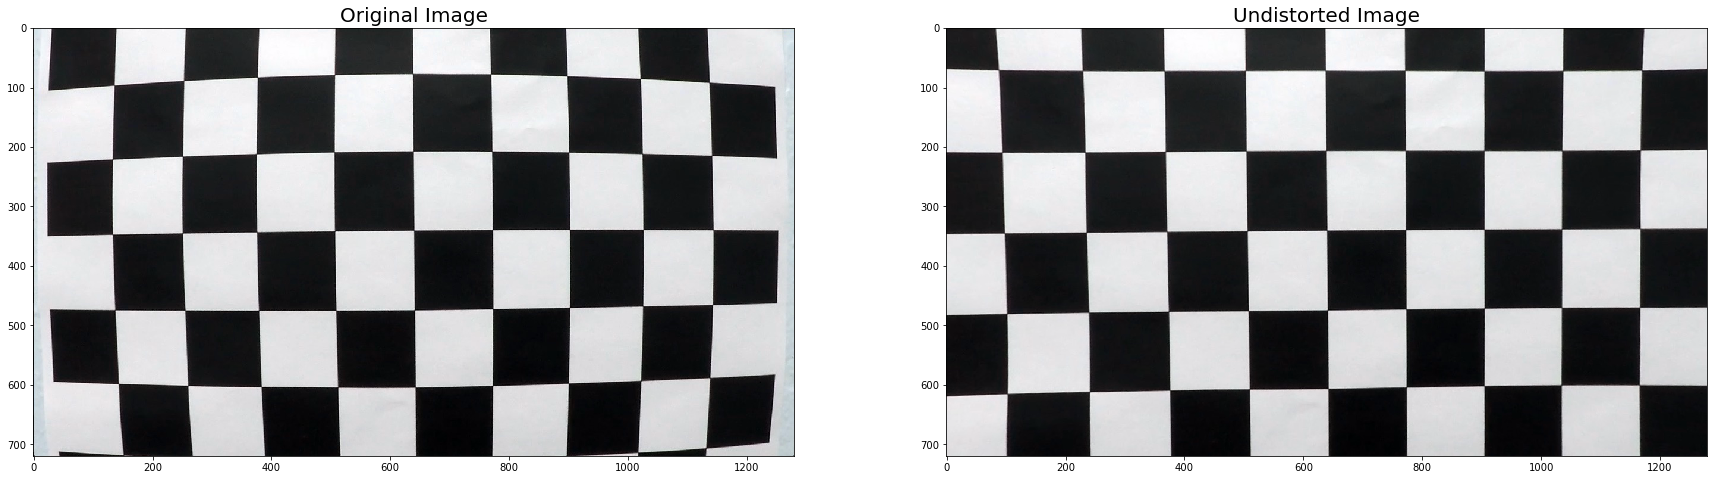

In [26]:
test_image = 'camera_cal/calibration1.jpg'
img = cv2.imread(test_image)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (img.shape[1], img.shape[0]), None, None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=20)